---
<img alt="bruno logo" width="15%" src="https://raw.githubusercontent.com/brunobonatini/Data_Science/main/logo.png">

#### **Data Scientist & Analyst**
*by [Bruno Bonatini](https://www.linkedin.com/in/bsbonatini/)*

---

# Detecção de Fraudes em Cartões de Crédito

<img src= "https://github.com/brunobonatini/Deteccao-de-fraudes-em-cartoes-de-credito/blob/main/deteccao_fraude.jpg?raw=true" width="80%"> 

A detecção de fraudes é uma tarefa crítica em muitas empresas, desde serviços financeiros até varejo online. Com o aumento do uso de transações digitais, a detecção de fraudes se tornou cada vez mais desafiadora, e muitas organizações lutam para detectar atividades fraudulentas em curto espaço de tempo.

De acordo com o site da [Globo](https://epocanegocios.globo.com/tecnologia/noticia/2023/02/brasil-teve-56-milhoes-de-tentativas-de-golpes-em-2022-conheca-as-principais-fraudes.ghtml), no ano de 2022 as fraudes no Brasil chegaram a quase 5,6 milhôes de tentativas. O estudo analisou 312,2 milhões de pedidos realizados no e-commerce, feitos via pagamento por cartão de crédito. Ao todo, as ações fraudulentas somaram prejuízos de R$5,8 bilhões.

As fraudes em cartões de crédito podem levar a perdas financeiras significativas e, muitas vezes, é difícil para as empresas detectarem essas atividades fraudulentas em um curto espaço de tempo.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algorítmo de Machine Learning pode gerar uma economia de milhões de reais para a empresa. E esse é o desafio, aprimorar cada vez mais o uso de algorítmos visando inibir ou evitar transações fraudulentas.

## Objetivo do Projeto

Este projeto tem como objetivo construir modelos de Machine Learning para detectar fraudes em transações de cartão de crédito. Serão utilizados dados históricos de transações rotuladas como fraudulentas ou não fraudulentas para treinar o modelo. 

A partir desse treinamento, os modelos serão capazes de aprender padrões e identificar transações fraudulentas em tempo real. O sucesso deste projeto pode ajudar a reduzir as perdas financeiras para as empresas de cartões de crédito e proteger os consumidores contra fraudes.

<img src = "https://github.com/brunobonatini/Deteccao-de-fraudes-em-cartoes-de-credito/blob/main/fraude_cartoes.jpg?raw=true" width = 80%>

## Importando os Dados

Os dados utilizados neste projeto foram disponibilizados por algumas empresas europeias de cartão de crédito no [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud). 

O ***dataset*** representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Este conjunto de dados é altamente desbalanceado, sendo que a classe positiva (fraudes) corresponde por apenas 0,17% de todas as transações.

Outro detalhe interessante é que as *features* são todas numéricas e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $(V1, V2, V3 \dots, V28)$ 

Também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

Ao utilizar a PCA, a ideia é reduzir a dimensão dos dados, mantendo a maior parte da informação possível em um número menor de componentes principais. Isso pode tornar a análise dos dados mais fácil e ajudar a descobrir padrões ou relações entre as variáveis originais.

Esses componentes são em número menor ou igual as variáveis originais. No caso deste projeto, os componentes encontrados pela transformação da PCA são as próprias colunas $(V1, V2, V3 \dots, V28)$.

## Primeiro contato com os Dados

Aqui será o nosso primeiro contato com o dataset, farei a importação das bibliotecas e olharei de forma superficial as primeiras entradas e o tamanho do conjunto de dados utilizado no projeto.

In [ ]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# configuração do estilo do plot
sns.set_style('dark')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importando o arquivo
data = "/content/drive/MyDrive/Projetos/Detecção_Fraudes_CartoesCredito/data_creditcard.csv"
df = pd.read_csv(data)

# verificando as primeiras entradas e o volume do dataset

print('Tamanho do dataset: {}\n'.format(df.shape))
df.head()

Tamanho do dataset: (284807, 31)



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Dicionário de Variáveis

Esta etapa tem como objetivo descrever as variáveis e compreender o que cada coluna significa.

Vale lembrar que as variáveis **V1-V28** passaram por uma descaracterização por motivos de privacidade. As únicas variáveis que não passaram por este processo foram *Time* e *Amount*.

* **Time** - segundos decorridos entre cada transação
* **Amount** - valor da transação 
* **Class** -  variável a ser prevista e assume valor 1 em caso de *fraude* e 0 em caso *normal*
* **V1-V28** - variáveis descaracterizadas por motivos de privacidade

<img src= "https://github.com/brunobonatini/Deteccao-de-fraudes-em-cartoes-de-credito/blob/main/deteccao_digital.jpg?raw=true" width="80%">

# Análise Exploratória

Farei uma exploração no dataset para entender melhor as características e a estrutura dos dados. Isso envolve verificar a presença de valores ausentes, verificar a consistência e integridade dos dados, explorar a distribuição dos dados por meio de gráficos e medidas estatísticas, identificar correlações e analisar dados categóricos.

In [ ]:
# analisando o resumo estatístico das variáveis
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Analisando as váriaveis que passaram pela transformação PCA, aparentemente não apresentam nenhuma discrepância. O mesmo acontece com a variável **Time**.

No caso da variável **Amount**, nota-se que:
* A média das transações tem o valor de 88.34
* A mediana tem o valor de 22.00
* O desvio padrão está em 250.12
* 75% dos valores para baixo é de 77.16
* O valor máximo de uma transação é de 25691.16

Ou seja, a maioria das transações são feitas com valores baixos.

In [ ]:
# verificando os tipos de dados e valores ausentes no dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# verificando os valores ausentes
df.isnull().sum().max()

0

Uma coisa boa é que não há valores ausentes neste dataset, isso significa que não precisamos nos preocupar em tratar estes dados.

Outro ponto é que todas as colunas possuem tipos de dados *float*, com excessão a coluna **"Class"** que possui tipo *int*.

Analisarei a coluna **Class** para saber como os dados estão classificados.

In [ ]:
# verificando a coluna Class
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Veja que na coluna **Class** temos 284.315 valores classificados como 0, indicando que não há fraude, e apenas 492 classificados como 1, havendo fraude.

Plotarei um gráfico de barras para ver como está o balanceamento da coluna **Class** e também um histograma para analisar como estas transações estão distribuídas na variável **Time**.

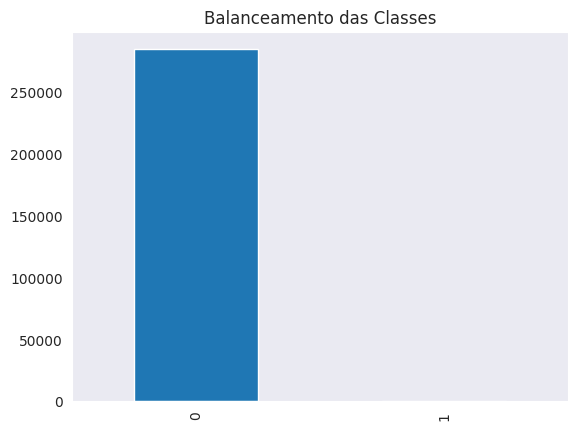

In [ ]:
# plotando o balanceamento das classes
fig, ax = plt.subplots()

df.Class.value_counts().plot(kind='bar', ax=ax)
ax.set_title('Balanceamento das Classes')

plt.show();

In [ ]:
# verificando a porcentagem de fraudes
fraudes = (df.Class.value_counts()[1]/df.shape[0])*100
print('Porcentagem de fraudes: {:.2}'.format(fraudes))

Porcentagem de fraudes: 0.17


Com o gráfico acima posso notar um desbalanceamento muito grande nos dados da variável **Class**, mostrando que apenas 0.17% dos dados estão classificados como fraudes, isso pode prejudicar muito o resultado final do modelo de Machine Learning.

Mais adiante farei o balanceamento dos dados para introduzi-los no modelo.

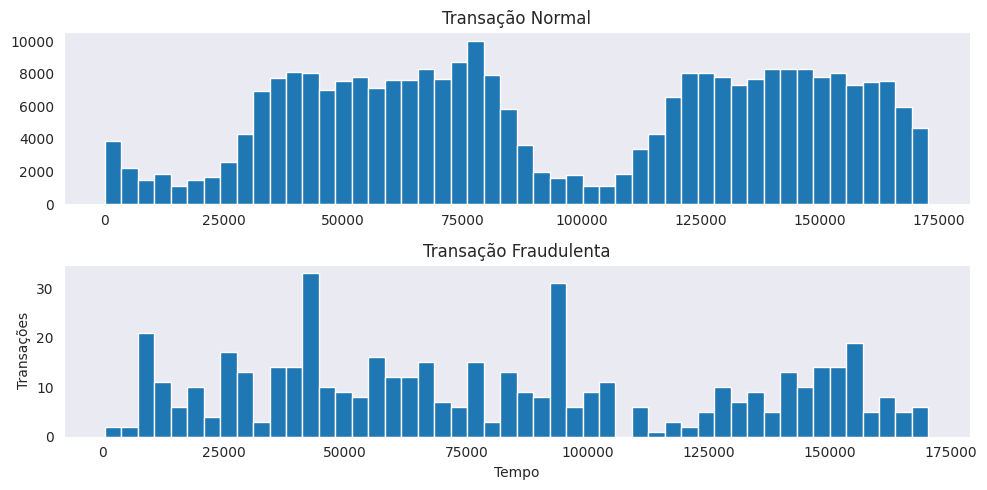

In [ ]:
# plotado um histograma para variável Time
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
num_bins = 50

ax[0].hist(df.Time[df.Class==0], bins=num_bins)
ax[0].set_title('Transação Normal')

ax[1].hist(df.Time[df.Class==1], bins=num_bins)
ax[1].set_title('Transação Fraudulenta')
ax[1].set_ylabel('Transações')
ax[1].set_xlabel('Tempo')

plt.tight_layout()

Analisando os dois gráficos, nota-se uma distribuição diferente nos dados de transações normais e fraudes, o que pode ajudar no treinamento do modelo de Machine Learning.

Agora vou analidar a variável Amount, para entender se há presença de outliers nos dados.

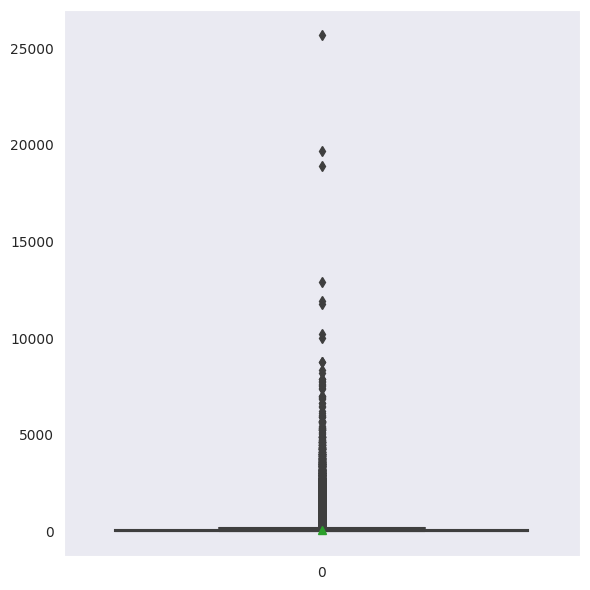

In [ ]:
# plotando um boxplot para variável Amount
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))  

sns.boxplot(df.Amount, ax=ax, showmeans=True)

plt.tight_layout()
plt.show()

Neste gráfico consigo perceber presença de outliers na variável **Amount**.

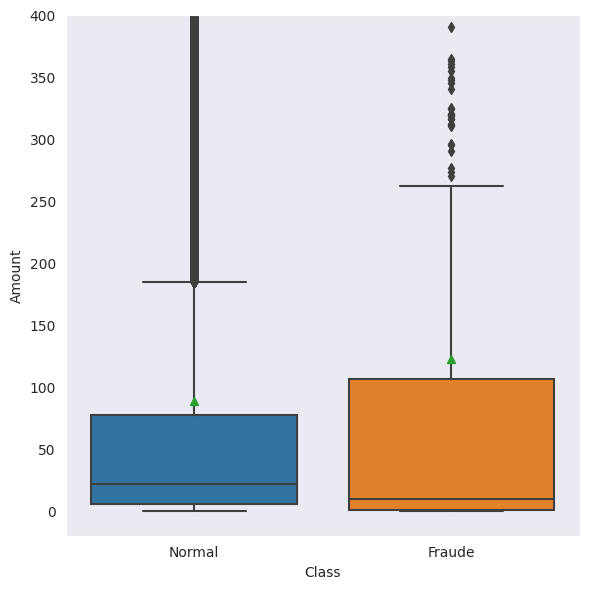

In [ ]:
# plotando um boxplot para análise das classificações
fig, ax = plt.subplots(figsize=(6,6))

sns.boxplot(x=df.Class, y=df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()
plt.show()

Observando este boxplot, pode-se notar que existe uma grande presença de outliers nos valores na variável **Class**, tanto para classificação normal, quanto para fraude.

Será preciso também padronizar as colunas *Time* e *Amount* para fazer as previsões com maior precisão.

Agora vou plotar um histograma para verificar os valores fraudulentos mais frequentes, sendo **Class = 1**.

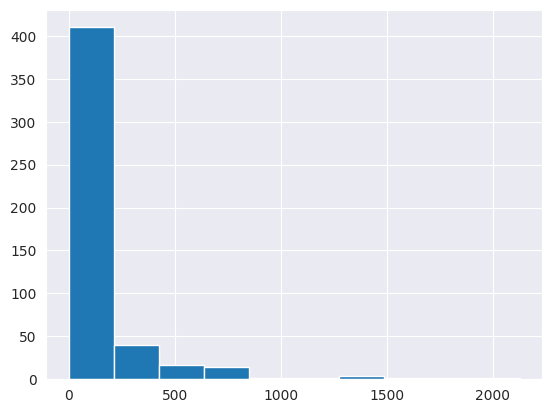

In [ ]:
# plotando um histograma para variável Amount
df.Amount.loc[df.Class==1].hist();

Com este histograma, fica nítido que a grande parte das fraudes estão entre 0 e 500, ou seja, a maior parte das transações fraudulentas são de baixo valor.

In [ ]:
# verificando os valores estatísticos classificados como fraudulentos
df.Amount.loc[df.Class==1].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# verificando a soma dos valores fraudulentos
tot_fraudes = df.Amount.loc[df.Class==1].sum()
print('Total de valores fraudulentos: {}'.format(tot_fraudes))

Total de valores fraudulentos: 60127.97


Nesta análise de valores fraudulentos, informei a coluna *Amount* (valor) e busquei por valores cuja classificação é igual a **1 (fraude)**.

Podemos tirar alguns insights sobre os valores classificados como fraudes:
* 75% dos valores  são abaixo de 105.89
* A média dos valores está em 122.21 e a mediana em 9.25
* Seu valor máximo é de 2125.87, fazendo com que a média suba, aumentando o desvio padrão dos dados.
* A soma do prejuízo que a empresa está levando é de 60127.97

Com a análise exploratória dos dados feita, vou agora iniciar o processo para criação dos modelos de Machine Learning, a fim de otimizar a detecção de fraudes em cartões de crédito, para que a empresa não leve prejuízos e o cliente se sinta mais seguro ao fazer uma transação financeira.

## Criando uma amostra para Teste

Separarei os dados para treino e teste em 80/20 com a função *split*, para que não haja vazamento dos dados, e guardar os dados de teste para serem utilizados no final do modelo.

In [ ]:
# tamanho do dataset verdadeiro
print('Tamanho do dataset original: {}'.format(df.shape))

# criando uma amostra de teste com 20% dos dados verdadeiros
teste = df.sample(frac=0.20, random_state=0)

# drop nos dados de teste no dataset verdadeiro
df = df.drop(teste.index)
df.shape

# comparando os conjuntos de dados
print('Tamanho do dataset de treino: {}'.format(df.shape))
print('Tamanho do dataset de teste: {}'.format(teste.shape))


Tamanho do dataset original: (284807, 31)
Tamanho do dataset de treino: (227846, 31)
Tamanho do dataset de teste: (56961, 31)


Veja que agora não temos mais 284807 entradas, e sim 227846 para *treino* e 56961 para *teste*. A amostra de teste contendo 20% do dataset original foi eliminada para não haver duplicidade nos dados.

Agora vou resetar o index dos datasets.

In [ ]:
# resetando o index dos datasets
df.reset_index()
teste.reset_index()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,...,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00,0
1,255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,...,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98,0
2,244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00,0
3,63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,...,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00,0
4,11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,...,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56956,197932,132242.0,-2.553810,-0.083991,-1.936271,-1.333610,1.151432,-1.256007,0.601789,0.309391,...,0.094768,1.383915,0.429534,0.319040,1.896602,0.245503,0.091951,-0.242711,33.24,0
56957,236778,148949.0,-1.227033,0.987207,0.654979,-2.559724,0.346834,-0.634095,0.738285,0.405477,...,-0.070342,-0.293542,-0.371721,0.518298,0.858450,0.749546,0.011475,0.027130,20.30,0
56958,127073,78200.0,1.250596,0.159552,0.147621,0.472220,-0.023937,-0.287444,0.021041,-0.041342,...,-0.210083,-0.580817,0.049119,-0.429060,0.299309,0.234803,-0.022217,0.006667,6.15,0
56959,208502,137149.0,1.125402,-2.288998,-3.123785,-0.103566,-0.311680,-1.151728,1.184200,-0.635862,...,0.263259,0.020985,-0.636845,-0.259110,0.272149,0.961966,-0.240867,-0.007494,583.21,0


Com os dados de teste separados e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, iniciarei a preparação dos dados com o objetivo de criar um modelo de Machine Learning que seja capaz de prever uma transação fraudulenta com maior precisão e eficiência.



## Preparando os Dados

Como visto na análise exploratória, o dataset encontra-se desbalanceado, portanto é preciso preparar os dados para que o modelo possa ter uma boa performance.

Para isso, realizarei os seguintes passos:

* Normalização dos dados para as variáveis *Time* e *Amount*
* Divisão do conjunto de dados entre treino e validação
* Balanceamento do conjunto de dados

## Padronização dos Dados

Padronização ou normalização é um processo que transforma os dados em uma escala comum, ajudando a melhorar a eficácia de alguns algorítmos de Machine Learning. Envolve a subtração da média de cada valor nos dados e a divisão pelo desvio padrão, resultando em um conjunto de dados com uma distribuição aproximadamente normal. 

É útil quando os valores nos dados têm escalas muito diferentes e alguns algorítmos são sensíveis à escala dos dados. Portanto, é uma etapa importante no pré-processamento de dados em Machine Learning e deve ser aplicada com cuidado, dependendo do algorítmo a ser utilizado e das características dos dados.

Farei a padronização dos dados nas colunas **Time** e **Amount** em novas colunas **std_amount** e **std_time**, transformando-as no mesmo padrão das demais variáveis do dataset, exceto a variável **Class**.

Como a variável **Amount** contém outliers, utilizarei a padronização *StandardScaler*, bastante útil em problemas de regressão linear e a regressão logística para normalizar dados que têm diferentes escalas.

In [ ]:
# criando uma cópia do dataset original
df_new = df.copy()

In [ ]:
# importando a biblioteca de padronização
from sklearn.preprocessing import StandardScaler

# padronizando as colunas Time e Amount em novas colunas
std_scaler = StandardScaler()
df_new['std_amount'] = std_scaler.fit_transform(df_new.Amount.values.reshape(-1,1))
df_new['std_time'] = std_scaler.fit_transform(df_new.Time.values.reshape(-1,1))

In [ ]:
# deletando as colunas Time e Amount
df_new.drop(['Time', 'Amount'], axis=1, inplace=True)

# verificando as primeiras entradas do novo dataset
df_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.245891,-1.996446
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346480,-1.996446
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.169303,-1.996425
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140584,-1.996425
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075150,-1.996404


## Dividindo os Dados entre *treino* e *validação*

Com os dados padronizados nas novas colunas **std_time** e **std_amount**, vou  separar os dados entre ***treino*** e ***validação*** antes de realizar o balanceamento, pois depois consigo fazer a comparação e verificar se o mesmo obteve melhora no resultado.

A fim de conseguir que os conjuntos de treino e validação tenham a quantidade de classes na mesma proporção, utilizarei *stratify* e *shuffle*.

* stratify: é uma técnica utilizada para dividir os dados em conjuntos de treinamento e teste de forma que as proporções das classes em cada conjunto sejam preservadas. Isso é especialmente útil quando se tem um conjunto de dados desbalanceado, ou seja, com uma classe tendo muito menos exemplos do que a outra.

* shuffle (embaralhar): é usado para aleatoriedade da ordem dos exemplos nos dados de treinamento durante o processo. Isso é feito para aumentar sua capacidade de generalização aos dados desconhecidos.

In [ ]:
# importando a biblioteca para separação dos dados
from sklearn.model_selection import train_test_split

# separando as variáveis
X = df_new.drop('Class', axis=1)
y = df_new['Class']

# dividindo os dados entre treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

In [ ]:
# mostrando o tamanho dos conjuntos de dados
print('Tamanho do conjunto X: {}'.format(X.shape))
print('Tamanho do conjunto y: {}'.format(y.shape))
print('Tamanho do conjunto X_train: {}'.format(X_train.shape))
print('Tamanho do conjunto X_val: {}'.format(X_val.shape))
print('Tamanho do conjunto y_train: {}'.format(y_train.shape))
print('Tamanho do conjunto y_val: {}'.format(y_val.shape))

Tamanho do conjunto X: (227846, 30)
Tamanho do conjunto y: (227846,)
Tamanho do conjunto X_train: (170884, 30)
Tamanho do conjunto X_val: (56962, 30)
Tamanho do conjunto y_train: (170884,)
Tamanho do conjunto y_val: (56962,)


## Balanceamento dos Dados

O balanceamento de dados em machine learning é o processo de ajustar a distribuição das classes em um conjunto de dados para evitar que o modelo seja enviesado para uma classe específica durante o treinamento. Isso pode ser feito de várias maneiras, como duplicar dados de uma classe menor ou gerar dados sintéticos para a classe menor. O objetivo é criar um conjunto de dados equilibrado que permita que o modelo seja treinado de forma mais precisa e eficaz.

 - **Oversampling**: é uma técnica de balanceamento de dados que duplica amostras da classe minoritária para equilibrar o conjunto de dados. Isso é feito quando há uma grande desproporção entre as classes e é difícil obter dados adicionais para a classe minoritária. No entanto, o oversampling pode aumentar o risco de overfitting e aumentar o tempo de treinamento do modelo. 

 - **Undersampling**: é uma técnica de balanceamento de dados que reduz a frequência da classe majoritária, selecionando uma amostra aleatória de cada observação dessa classe. Essa técnica é usada quando há uma grande desproporção entre as classes, mas pode levar à perda de informações. Por isso, é importante avaliar cuidadosamente as consequências de usar essa técnica e, em alguns casos, combinar com outras técnicas de balanceamento de dados para preservar as informações importantes.

Para realizar técnicas de balanceamento dos dados, utilizamos a biblioteca **imblearn**. Neste projeto vou usar o método *Under-sampling*, o qual tem como característica, preservar a classe minoritária, reduziando a classe majoritária selecionando uma amostra aleatória.

In [ ]:
# importando a biblioteca para balanceamento dos dados
from imblearn.under_sampling import RandomUnderSampler

# utilizando a técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

0    293
1    293
Name: Class, dtype: int64


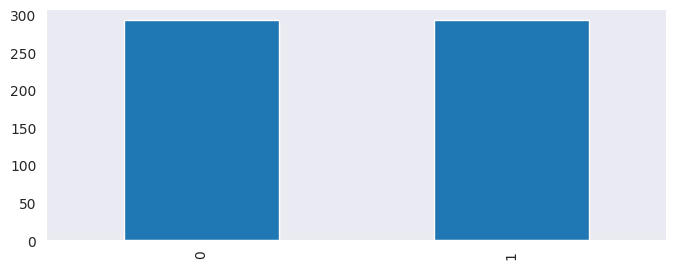

In [ ]:
# plotando as classificações balanceadas
y_rus.value_counts().plot(kind='bar', figsize=(8, 3))

# mostrando o balanceamendo da variável Class
print(pd.Series(y_rus).value_counts())

Feito o balanceamento é possível evitar o *Overfiting*, que é quando um modelo se torna muito bom para fazer previsões com os dados de treino e ruím com os dados de teste, pois aprende demais com os dados vistos frequentemente e acaba não performando com os dados não vistos como no mundo real.

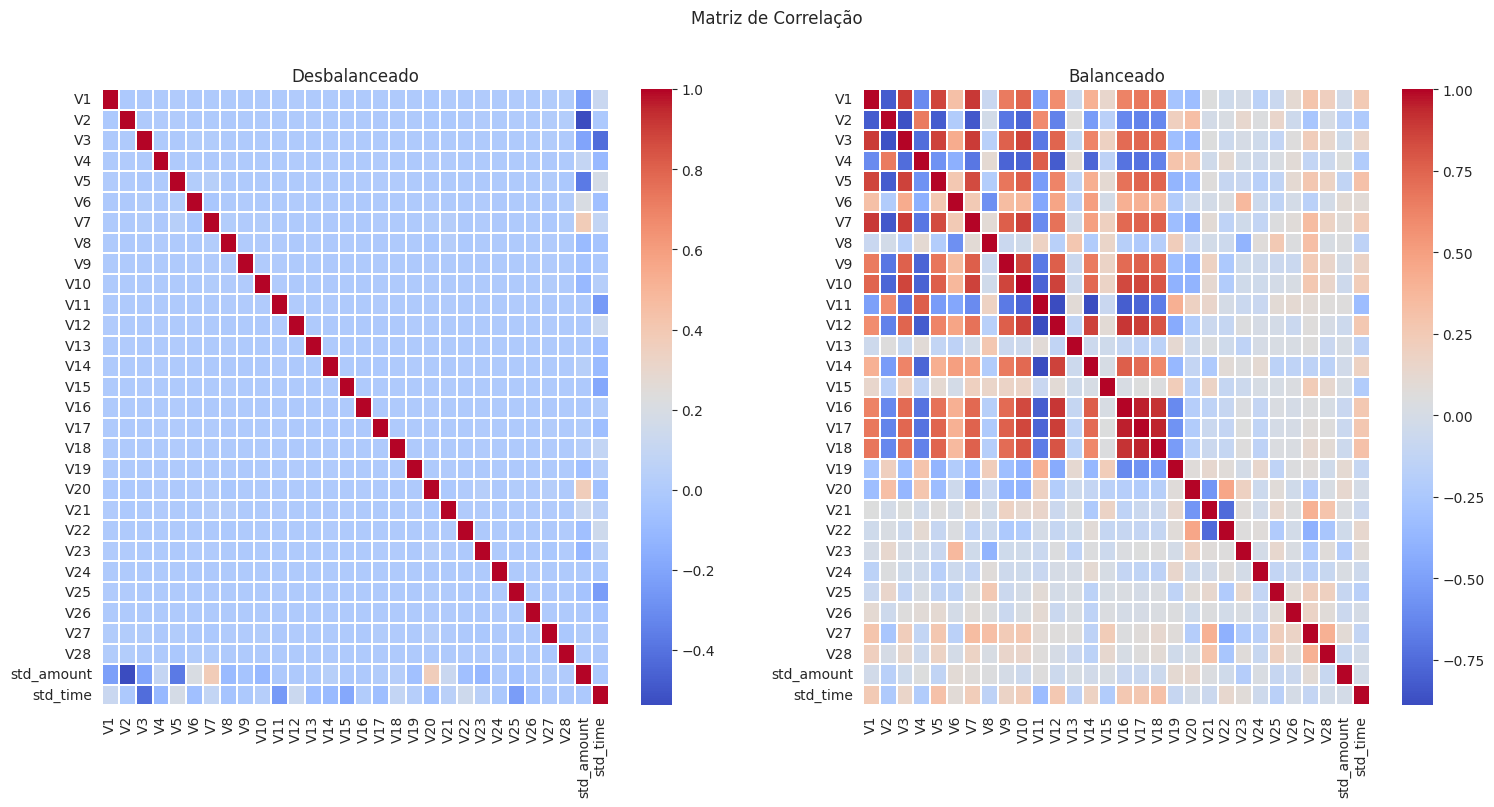

In [ ]:
# plotando uma de matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

## Machine Learning

**Machine Learning** é uma técnica em que os computadores aprendem a identificar padrões e relações nos dados, sem a necessidade de serem programados, através de algoritmos e modelos matemáticos. São usados para tomar decisões ou prever resultados futuros.

Os modelos de **Machine Learning** são construídos a partir de um conjunto de dados de treinamento e podem ser de diversos tipos, como Regressão Linear, Regressão Logística, Árvores de Decisão, entre outros. 

Para construir um modelo eficaz, é importante ajustar seus hiperparâmetros adequadamente, além de utilizar um conjunto de dados de treinamento suficientemente grande e representativo.

## Construção do Modelo - Regressão Logística

Um modelo de Regressão Logística é usado para prever a probabilidade de um evento binário (ex: sim/não, verdadeiro/falso). É útil para problemas de classificação, onde o objetivo é prever em qual de duas categorias uma observação pertence.

É frequentemente usado para prever coisas como se um cliente comprará ou não um produto, ou se uma transação é fraudulenta ou não.

Neste modelo, utilizarei três métricas para realizar as análises de performance:

* **Classification Report**: é uma tabela de métricas que resume o desempenho de um modelo de classificação em Machine Learning. Ele apresenta um conjunto de medidas que permitem avaliar a precisão do modelo em relação a cada classe prevista.

 - **Precision**: é a proporção de instâncias classificadas como positivas que são realmente positivas. Quanto maior o valor da precisão, melhor é o desempenho do modelo em identificar corretamente as instâncias positivas de uma classe.

 - **Recall**: é a proporção de instâncias positivas que foram corretamente identificadas pelo modelo. Quanto maior o valor do recall, melhor é o desempenho do modelo em identificar corretamente todas as instâncias positivas de uma classe.

 - **F1-score**: é uma métrica comumente usada para avaliar o desempenho de um modelo de classificação. Ele é calculado como a média harmônica entre a precisão e o recall. O F1-score varia entre 0 e 1, sendo que um valor de 1 indica que o modelo tem uma precisão e recall perfeitos. É uma métrica muito útil para avaliar o desempenho do modelo de classificação, especialmente quando as classes são desbalanceadas, pois ele considera tanto a precisão quanto o recall de forma igual.

 - **Support**: o número de instâncias reais de cada classe.

* **Accuracy** (acurácia): é uma métrica usada para medir a precisão de um modelo de classificação. A acurácia é a proporção de instâncias classificadas corretamente em relação ao total de instâncias. No entanto, a acurácia nem sempre é a melhor métrica para avaliar o desempenho do modelo, especialmente em casos de classes desbalanceadas ou custos desiguais de erros.

* **AUC** (área sob a curva): é uma métrica usada para avaliar o desempenho de um modelo de classificação binária. Ele mede a habilidade do modelo em classificar corretamente exemplos positivos e negativos, independentemente do ponto de corte escolhido. O AUC varia de 0 a 1, sendo que quanto maior o valor, melhor o desempenho do modelo.

Vou agora construir um modelo de Regressão Logística a fim de analisar seu desempenho na detecção de fraudes de cartões de crédito.

## Previsão com os Dados de Validação

In [ ]:
# importando as bibliotecas para modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [ ]:
# instanciando o modelo e escolhendo os hiperparâmetros
modelrl = LogisticRegression()

# treinando o modelo
modelrl.fit(X_rus, y_rus)

# fazendo previsões em cima dos dados de teste (validação)
y_pred = modelrl.predict(X_val)
y_proba = modelrl.predict_proba(X_val)

<Axes: >

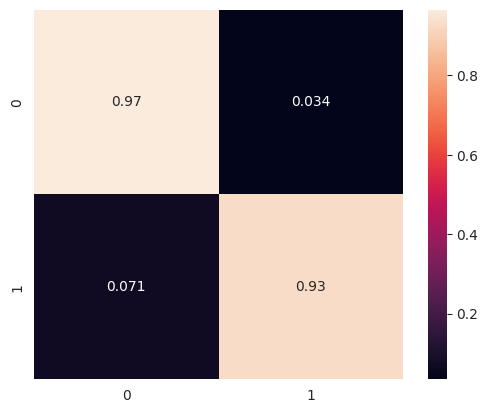

In [ ]:
# plotando uma matriz de confusão
matriz = confusion_matrix(y_val, y_pred, normalize='true')
sns.heatmap(matriz, square=True, annot=True)


In [ ]:
# mostrando o relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_val, y_pred, digits=4))

# mostrando a acurácia do model0
print('Acurácia:{:.4f}\n'.format(accuracy_score(y_val, y_pred)))

# mostrando a curva de classificação do modelo
print('AUC:{:.4f}'.format(roc_auc_score(y_val, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9656    0.9825     56864
           1     0.0445    0.9286    0.0849        98

    accuracy                         0.9656     56962
   macro avg     0.5222    0.9471    0.5337     56962
weighted avg     0.9982    0.9656    0.9809     56962

Acurácia:0.9656

AUC:0.9471


Analisando o modelo com os dados de validação:
* O modelo conseguiu prever 93% dos valores classificados como fraudes, isso é um bom número, pois o principal objetivo de um modelo para previsão de fraudes é justamente acertar o número de transações fraudulentas.
* O modelo conseguiu uma acurácia de 96%.
* A curva de classificação do modelo ficou em 0.9471, bem próxima de 1. 

## Previsão com os Dados de Teste

Para saber se um modelo está realmente desempenhando bem, precisamos fazer as previsões com os dados não vistos, os dados de teste que separamos anteriormente em 20% do dataset original.

Separei 3 conjuntos de dados, um de treino, um de validação e um de teste.
Foram padronizados os dados de treino e validação, faltando os de teste, é o que eu farei neste momento para que o modelo receba estes dados da mesma maneira, na mesma escala como o restante do dataset.

Vou padronizar os dados de teste das colunas **Time** e **Amount** da mesma maneira que os dados de treino e validação, porém não vou balanceá-los, para não haver nenhuma perda de informações.

In [ ]:
# criando uma cópia para os dados de teste
teste_clean = teste.copy()

# padronizando os dados de teste
std_scaler = StandardScaler()
teste_clean['std_amount'] = std_scaler.fit_transform(teste_clean['Amount'].values.reshape(-1, 1))
teste_clean['std_time'] = std_scaler.fit_transform(teste_clean['Time'].values.reshape(-1, 1))


# deletando a coluna Time e Amount do dataset de teste
teste_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# verificando o dataset teste_clean
teste_clean.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.182858,0.655212
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.330062,1.317429
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.033961,1.217003
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.854774,-0.923577
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.318369,-1.577658


In [ ]:
teste_clean.shape

(56961, 31)

Com o *dataset* de teste padronizado, vou separar os dados para treino e teste, inserí-los no modelo de **Regressão Logística** e analisar sua performance em relação aos dados de treino e validação que foram balanceados.

In [ ]:
# separando as variáveis entre treino e teste
X_teste = teste_clean.drop('Class', axis=1)
y_teste = teste['Class']

In [ ]:
# fazendo previsões em cima dos dados de teste
y_pred = modelrl.predict(X_teste)
y_proba = modelrl.predict_proba(X_teste)

<Axes: >

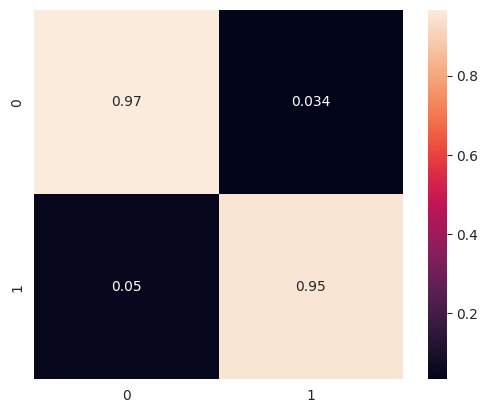

In [ ]:
# plotando a matriz de confusão
matriz2 = confusion_matrix(y_teste, y_pred, normalize='true')
sns.heatmap(matriz2, square=True, annot=True)

In [ ]:
# mostrando o relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_teste, y_pred, digits=4))

# mostrando a acurácia do model0
print('Acurácia:{:.4f}\n'.format(accuracy_score(y_teste, y_pred)))

# mostrando a curva de classificação do modelo
print('AUC:{:.4f}'.format(roc_auc_score(y_teste, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9660    0.9827     56860
           1     0.0473    0.9505    0.0901       101

    accuracy                         0.9660     56961
   macro avg     0.5236    0.9582    0.5364     56961
weighted avg     0.9982    0.9660    0.9811     56961

Acurácia:0.9660

AUC:0.9582


## Avaliação do desempenho do modelo de Regressão Logística

Conforme os resultados obtidos com o Modelo de Regressão Logística, a acurácia se manteve em 0.96 e houve um aumento na previsão das fraudes de 0.93 para 0.95 com os dados de teste que não foram balanceados, em relação aos dados de validação que foram balanceados.

Isso mostra que nem sempre a melhor opção é realizar o balanceamento dos dados para conseguir uma performance do modelo.


## Construção do Modelo - Árvore de Decisão

Modelo de **Árvore de Decisão** é um algoritmo de Machine Learning que utiliza uma estrutura de árvore para representar uma série de decisões e suas possíveis consequências. 

É usado para classificar ou prever uma variável alvo a partir de um conjunto de variáveis de entrada. O modelo percorre a árvore seguindo as decisões que levam a um nó terminal, que corresponde à previsão ou classificação final. 

São fáceis de interpretar e podem ser usadas em problemas de classificação e regressão, além de lidar com dados categóricos e numéricos e serem menos sensíveis a dados ausentes e outliers.

É frequentemente utilizada em modelos de classificação, em que o objetivo é categorizar um conjunto de dados em classes distintas, que é o nosso caso neste projeto.

Existem alguns parâmetros que são comuns em muitas implementações, tais como:

- **max_depth**: a profundidade máxima da árvore, ou seja, o número máximo de nós que podem ser percorridos da raiz até uma folha.
- **min_samples_split**: o número mínimo de amostras necessárias para dividir um nó interno.
- **min_samples_leaf**: o número mínimo de amostras necessárias para serem consideradas como uma folha.
- **max_features**: o número máximo de atributos que podem ser considerados para a divisão de um nó.

Vou criar um modelo de **Árvore de Decisão** a fim de comparar o seu desempenho quanto ao modelo de Regressão Logística e analisar qual o melhor modelo para nosso problema de detecção de fraudes em cartões de crédito. Utilizarei também o parâmetro **max_depth** para limitar o número de nós da árvore.

## Previsão com os Dados de Validação

In [ ]:
# importando as bibliotecas
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instanciando o modelo e escolhendo os hiperparâmetros
modeldt = DecisionTreeClassifier(max_depth=3, criterion='entropy')

<Axes: >

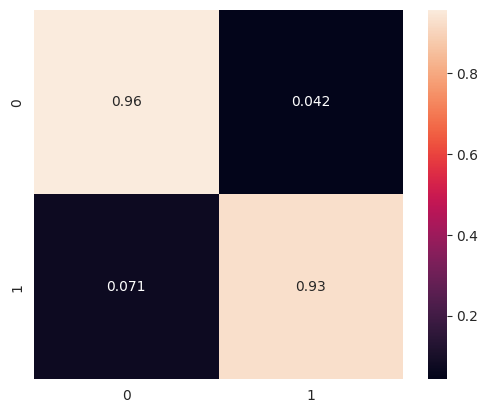

In [ ]:
# treinando o modelo
modeldt.fit(X_rus, y_rus)

# fazendo previsões com os dados de validação
y_pred = modeldt.predict(X_val)
y_proba = modeldt.predict_proba(X_val)

# plotando uma matriz de confusão
matriz3 = confusion_matrix(y_val, y_pred, normalize='true')
sns.heatmap(matriz3, square=True, annot=True)

In [ ]:
# mostrando o relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_val, y_pred, digits=4))

# mostrando a acurácia do model0
print('Acurácia:{:.4f}\n'.format(accuracy_score(y_val, y_pred)))

# mostrando a curva de classificação do modelo
print('AUC:{:.4f}'.format(roc_auc_score(y_val, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9576    0.9783     56864
           1     0.0364    0.9286    0.0701        98

    accuracy                         0.9576     56962
   macro avg     0.5181    0.9431    0.5242     56962
weighted avg     0.9982    0.9576    0.9767     56962

Acurácia:0.9576

AUC:0.9431


Analisando o modelo com os dados de validação:
* O modelo conseguiu prever 93% dos valores fraudulentos classificados como 1, o que mostra um bom desemprenho quando nosso principal objetivo é prever estes valores
* Sua acurácia foi de aproximadamente 95%, quase a mesma que no modelo de Regressão Logística
* O AUC foi de 0.9431, um pouco acima do modelo de Regressão Logística, e bem próximo de 1 que é um bom número.

## Previsão com os Dados de Teste

<Axes: >

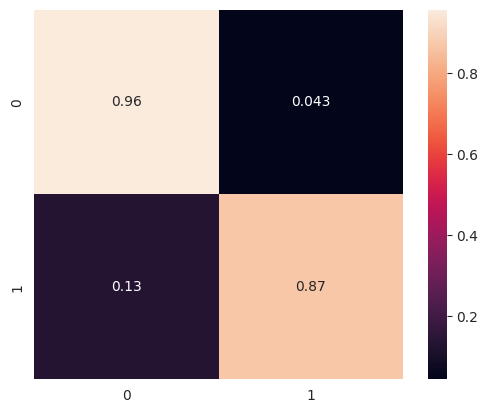

In [ ]:
# fazendo previsão com os dados de teste
y_pred = modeldt.predict(X_teste)
y_proba = modeldt.predict_proba(X_teste)

# plotando a matriz de confusão
matriz4 = confusion_matrix(y_teste, y_pred, normalize='true')
sns.heatmap(matriz4, square=True, annot=True)

In [ ]:
# mostrando o relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_teste, y_pred, digits=4))

# mostrando a acurácia do model0
print('Acurácia:{:.4f}\n'.format(accuracy_score(y_teste, y_pred)))

# mostrando a curva de classificação do modelo
print('AUC:{:.4f}'.format(roc_auc_score(y_teste, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9571    0.9780     56860
           1     0.0348    0.8713    0.0670       101

    accuracy                         0.9570     56961
   macro avg     0.5173    0.9142    0.5225     56961
weighted avg     0.9981    0.9570    0.9764     56961

Acurácia:0.9570

AUC:0.9142


## Avaliação do Modelo de Árvore de Decisão

Com o resultado da previsão com os dados de teste neste modelo, posso concluir que teve uma queda de 93% para 87% quando falamos na capacidade de prever as fraudes classificadas como 1, sua acurácia se manteve em 95% e houve queda também no AUC, de 0.9431 para 0.9142.

Isso mostra que neste modelo, balanceando os dados de teste, poderia alcançar uma previsão melhor nos valores fraudulentos cuja classe é igual a 1.



## Conclusão

Para que o Cientista de Dados possa construir modelos de Machine Learning ideais para resolução de problemas, ele precisa ao menos conhecer sobre o negócio em que está trabalhando.

Neste projeto o objetivo era criar modelos para prevenções de fraudes em cartões de crédito e avaliar quais dos modelos teriam melhor performance e precisão, principalmente na classe classificada como fraude, sem deixar de analisar os falsos positivos e negativos, que geram alertas para as instituições financeiras.

Apesar do dataset não apresentar valores ausentes e estar bem distribuído, os dados estavam muito desbalanceados, sendo preciso aplicar métodos e técnicas para obter um melhor resultado nos modelos, exigindo do profissional um conhecimento a mais no assunto.

Com os resultados obtidos, o modelo de Regressão Logística teve uma pequena vantangem em relação ao modelo de Árvore de Decisão para este caso, lembrando que é possível realizar outras técnicas e outros algoritmos que podem trazer outros resultados.



## Bibliografia

Machine Learning Mastery:
https://machinelearningmastery.com/types-of-classification-in-machine-learning/

https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/

Edureka:
https://www.edureka.co/blog/classification-in-machine-learning/

Scikit-Learn: 
https://scikit-learn.org/stable/modules/tree.html

Sigmoidal:
https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/

*“Sem dados você é apenas uma pessoa qualquer com uma opinião.”*

*William Edwards Deming*